# Project: Train a Character Recognition System with MNIST

## Importing The Needed Libraries and Methods

In [1]:
## Importing the needed imports

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

from torchvision import datasets
from torch.utils.data import DataLoader


import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"



# Section 1: Data Loading and Exploration

## A. Downloading The Datasets and The Testing Set

In [2]:
# Define transforms
transformss = transforms.ToTensor()




# Creating training set
training_data = datasets.MNIST(
    root = "data",
    train = True,
    download = True,
    transform = transformss
)
#defining training dataloader with shuffled batches of size of a 100
training_loader = DataLoader(
    training_data,
    batch_size = 100,
    shuffle = True
)




# Creating testing set
testing_data = datasets.MNIST(
    root = "data",
    train = False,
    download = True,
    transform = transformss
)
# Defining testing dataloader with shuffled batches of size of a 100
testing_loader = DataLoader(
    testing_data,
    batch_size = 100,
    shuffle = True
)



#Define The Inputs and Outputs for The Training Data
x_train = []
y_train = []
for image, label in training_data:
    x_train.append(image)
    y_train.append(label)
x_train_tensor = torch.stack(x_train)
y_train_tensor = torch.tensor(y_train)



#Define The Inputs and Outputs for The Testing Data
x_train_t = []
y_train_t = []
for image, label in testing_data:
    x_train_t.append(image)
    y_train_t.append(label)
x_train_t_tensor = torch.stack(x_train_t)
y_train_t_tensor = torch.tensor(y_train_t)


## B. Exploring The Data Set

### B1. Showing The Shape of The Training and Testing Datasets

In [3]:
#Printing The Shape of The Training Dataset
training_data.data.shape

torch.Size([60000, 28, 28])

In [4]:
#Printing The Shape of The Testing Dataset
testing_data.data.shape

torch.Size([10000, 28, 28])

### B2. Showing Some of The Training and Testing Images

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i]))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

def showImage(image, label):
    plt.imshow(image.squeeze().numpy(), cmap='gray')  # Assuming grayscale images
    plt.title(f'Label: {label.item()}')  # Display the label as the title
    plt.show()


Five of the training images
7


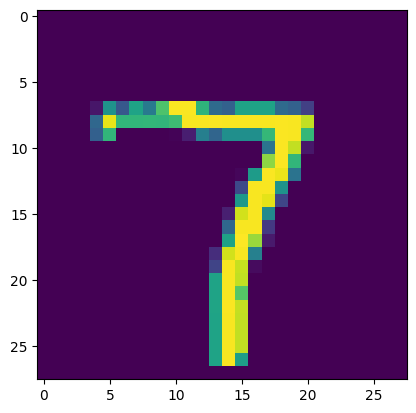

8


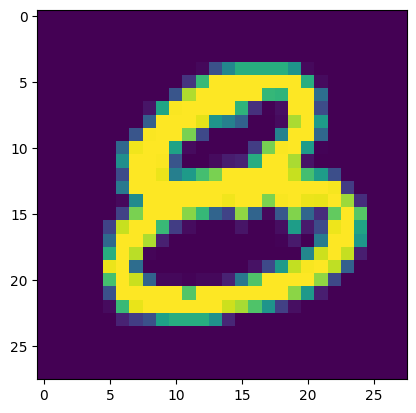

2


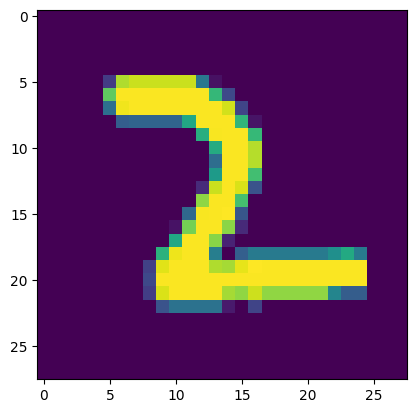

7


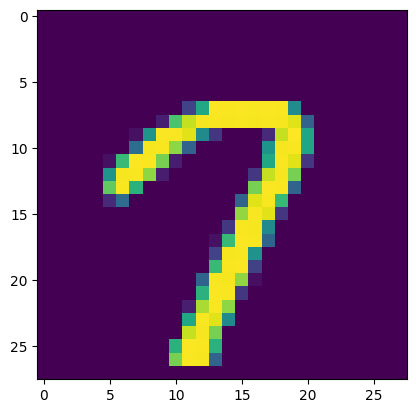

8


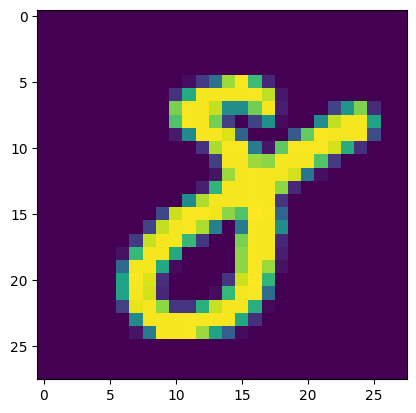

Five of the testing images
1


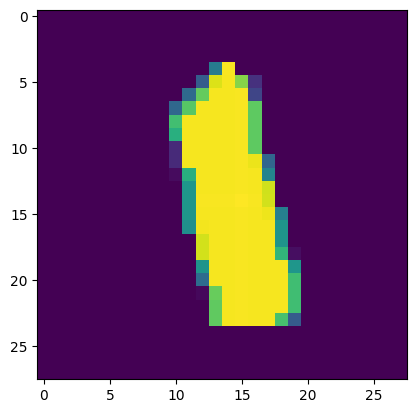

4


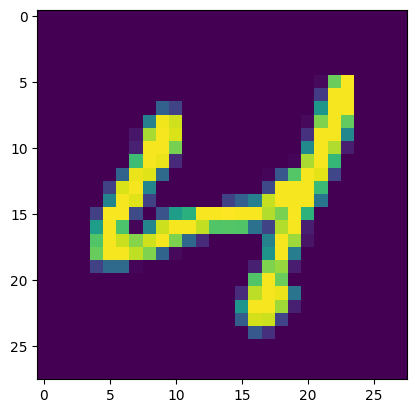

7


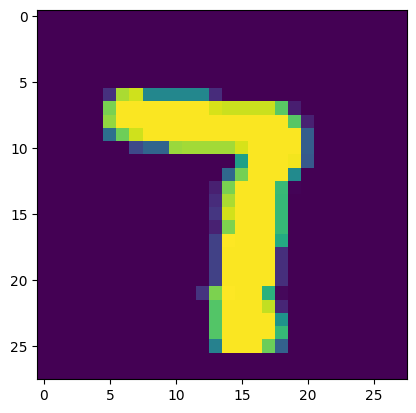

9


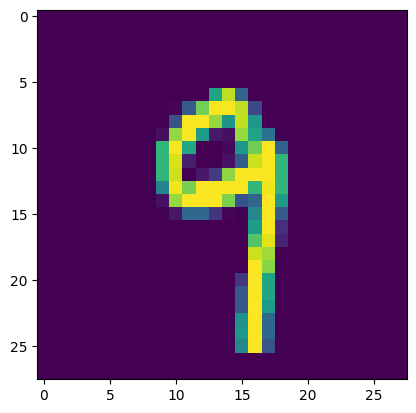

5


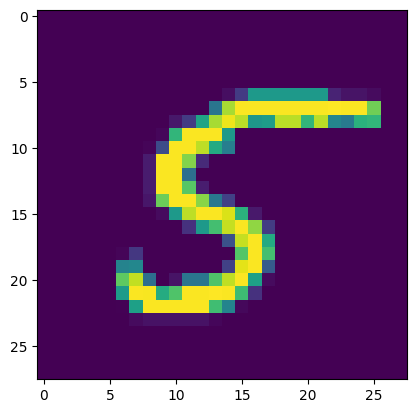

In [6]:
# Explore data
print ('Five of the training images')
show5(training_loader)

print ('Five of the testing images')
show5(testing_loader)

## C. Preprocessing Steps

#### 1. The training and testing datasets have been converted to tensors by using the .ToTensor() transform from torchvision.transforms.
#### 2.  Faltening the data will be done when defining the forward function when desining the neural netwrok.

# Section 2: Model Design and Training

## A. Building The Neural Network

In [7]:
class ImageClassifier(nn.Module): # The Image Classifier class is going to inherit from nn.Module class
    
    def __init__ (self, inputs = 28*28, h1= 64, h2=32, h3=16, outputs=10):
        super().__init__()
        self.fc1 = nn.Linear (inputs, h1)
        self.fc2 = nn.Linear (h1, h2)
        self.fc3 = nn.Linear (h2, h3)
        self.out = nn.Linear (h3, outputs)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x= F.relu(self.fc1(x))
        x= F.relu(self.fc2(x))
        x= F.relu(self.fc3(x))
        x= self.out(x)

        return x

model = ImageClassifier()

## B. Setting up the optimzer

In [8]:
criterion = nn.CrossEntropyLoss() #The chosed loss function is cross entropy
learner = optim.Adam(model.parameters(), lr=0.01) #The chosed optimizer is Adam

## C. Training The Network

In [9]:
epochs=100
losses=[]
accuracies = []
losses_t=[]
accuracies_t=[]

for epoch in range (epochs):

    
    #feeding the model with the input and calculating training loss:
    y_prediction = model.forward(x_train_tensor)
    loss = criterion(y_prediction,y_train_tensor)
    losses.append(loss.detach().numpy())
    #feeding the model with the input and calculating testing loss:
    y_prediction_t = model.forward(x_train_t_tensor)
    loss_t = criterion(y_prediction_t,y_train_t_tensor)
    losses_t.append(loss_t.detach().numpy())
 

    
    #calculate training accuracy:
    _, predicted_labels = torch.max(y_prediction, 1)
    correct_predictions = (predicted_labels == y_train_tensor).sum().item()
    accuracy = correct_predictions / len(y_train_tensor)
    accuracies.append(accuracy)
    #calculate testing accuracy:
    _, predicted_labels_t = torch.max(y_prediction_t, 1)
    correct_predictions_t = (predicted_labels_t == y_train_t_tensor).sum().item()
    accuracy_t = correct_predictions_t / len(y_train_t_tensor)
    accuracies_t.append(accuracy_t)

    #Priting The Caclulated Information
    if epoch % 10 == 0:
        print ('epcoh: ', epoch, ' - Training Loss is:', loss.detach().numpy(), '. Training Accuracy is:', accuracy)
        print ('epcoh: ', epoch, ' - Testing Loss is:', loss_t.detach().numpy(), '. Testing Accuracy is:', accuracy_t)

    #Start Learning
    learner.zero_grad()
    loss.backward()
    learner.step()

epcoh:  0  - Training Loss is: 2.3170395 . Training Accuracy is: 0.09736666666666667
epcoh:  0  - Testing Loss is: 2.3166077 . Testing Accuracy is: 0.0982
epcoh:  10  - Training Loss is: 1.0817317 . Training Accuracy is: 0.6501166666666667
epcoh:  10  - Testing Loss is: 1.067005 . Testing Accuracy is: 0.6568
epcoh:  20  - Training Loss is: 0.559223 . Training Accuracy is: 0.8200666666666667
epcoh:  20  - Testing Loss is: 0.5544103 . Testing Accuracy is: 0.8269
epcoh:  30  - Training Loss is: 0.38283044 . Training Accuracy is: 0.8857833333333334
epcoh:  30  - Testing Loss is: 0.3824197 . Testing Accuracy is: 0.8853
epcoh:  40  - Training Loss is: 0.28048602 . Training Accuracy is: 0.918
epcoh:  40  - Testing Loss is: 0.29008082 . Testing Accuracy is: 0.9133
epcoh:  50  - Training Loss is: 0.21747203 . Training Accuracy is: 0.9356666666666666
epcoh:  50  - Testing Loss is: 0.22919038 . Testing Accuracy is: 0.9326
epcoh:  60  - Training Loss is: 0.17796719 . Training Accuracy is: 0.948416

Text(0.5, 0, 'Epochs')

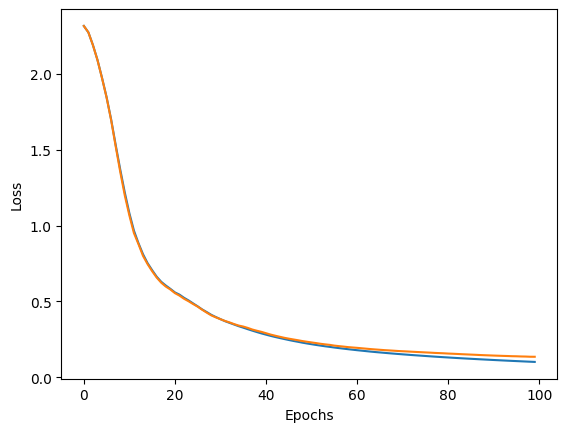

In [10]:
plt.plot(range(epochs),losses,losses_t)
plt.ylabel('Loss')
plt.xlabel('Epochs')

# Section 3: Model Testing and Evaluation

## A. Testing

In [11]:
indexes = 10000
count = 0
# Get the input image and corresponding label from the testing set
for index in range(indexes):
    input_image = x_train_t_tensor[index]
    actual_label = y_train_t_tensor[index]


    # Pass the input image through the trained model to get the predicted label
    with torch.no_grad():
        y_prediction_single_instance = model.forward(input_image.unsqueeze(0))
    # Get the predicted label
        _, predicted_label_single_instance = torch.max(y_prediction_single_instance, 1)
    if (actual_label != predicted_label_single_instance.item()) :
        count = count + 1
print (count, 'errors in', indexes, ' images.', ' Which means, The Accuracy over the testing set is: ', ((indexes-count)/indexes)*100,'%')

387 errors in 10000  images.  Which means, The Accuracy over the testing set is:  96.13000000000001 %


## B. Saving The Model

In [12]:
# Save the trained model to a file using raw string literal
torch.save(model.state_dict(), r'C:\Users\HUAWEI\Documents\MLJourney\Step 3\Course\Deep Learning Nanodegree\FirstProject\model1.pth')


## C. Improvements

The Model performed very well (96% accuracy on the training set).